PART II

In [ ]:
#1

Simulated 1000 samples for U and V.
Simulated 10000 samples for U and V.
Simulated 100000 samples for U and V.


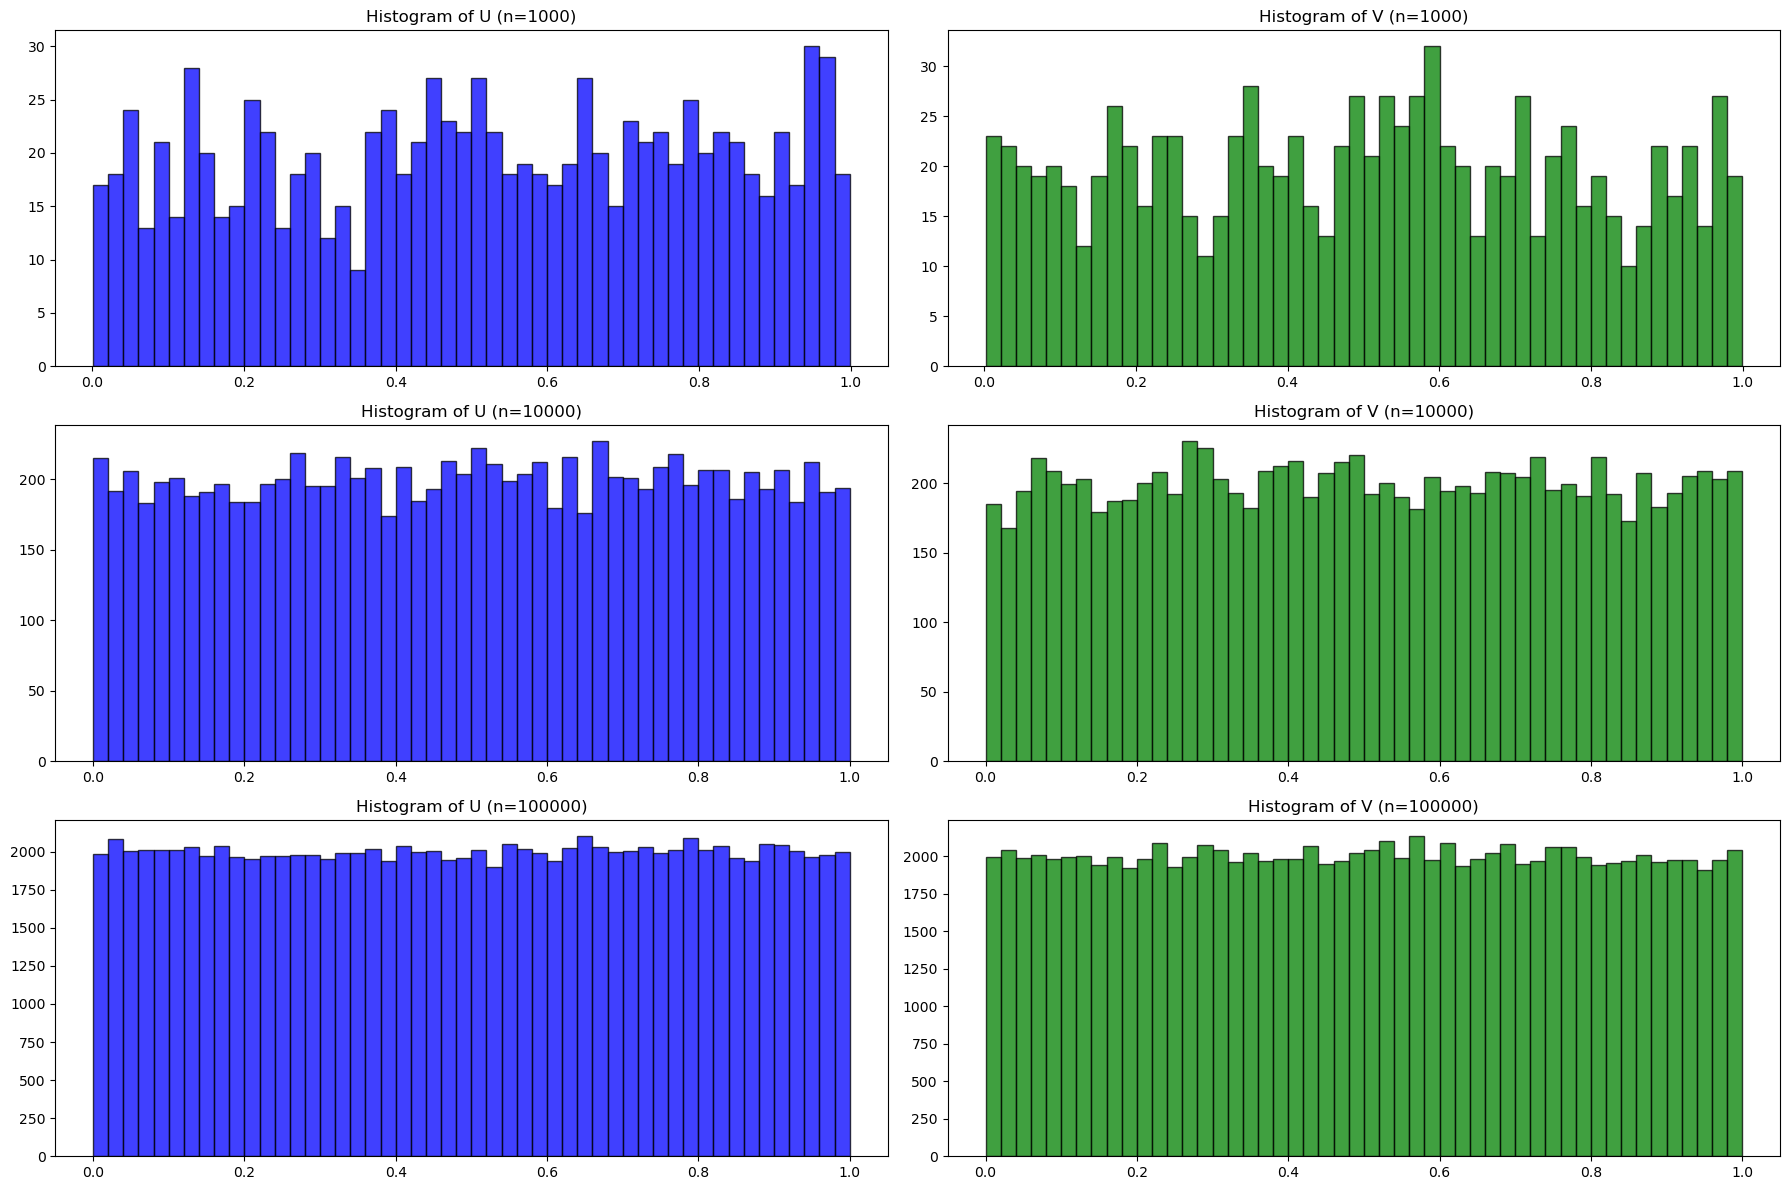

In [1]:
#ex a 
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate uniform(0,1) random variables
def simulate_uniform_rvs(sample_size):
    U = np.random.uniform(0, 1, sample_size)
    V = np.random.uniform(0, 1, sample_size)
    return U, V

# Sample sizes
sample_sizes = [1000, 10000, 100000]

# Dictionary to hold the results
results = {}

# Simulate for each sample size
for n in sample_sizes:
    U, V = simulate_uniform_rvs(n)
    results[n] = (U, V)
    print(f"Simulated {n} samples for U and V.")

# Plot the histograms of the results for visual inspection
plt.figure(figsize=(18, 12))

for i, n in enumerate(sample_sizes):
    U, V = results[n]
    
    plt.subplot(3, 2, 2*i + 1)
    plt.hist(U, bins=50, alpha=0.75, color='blue', edgecolor='black')
    plt.title(f'Histogram of U (n={n})')
    
    plt.subplot(3, 2, 2*i + 2)
    plt.hist(V, bins=50, alpha=0.75, color='green', edgecolor='black')
    plt.title(f'Histogram of V (n={n})')

plt.tight_layout()
plt.show()


Simulated 1000 samples for X and Y.
Simulated 10000 samples for X and Y.
Simulated 100000 samples for X and Y.


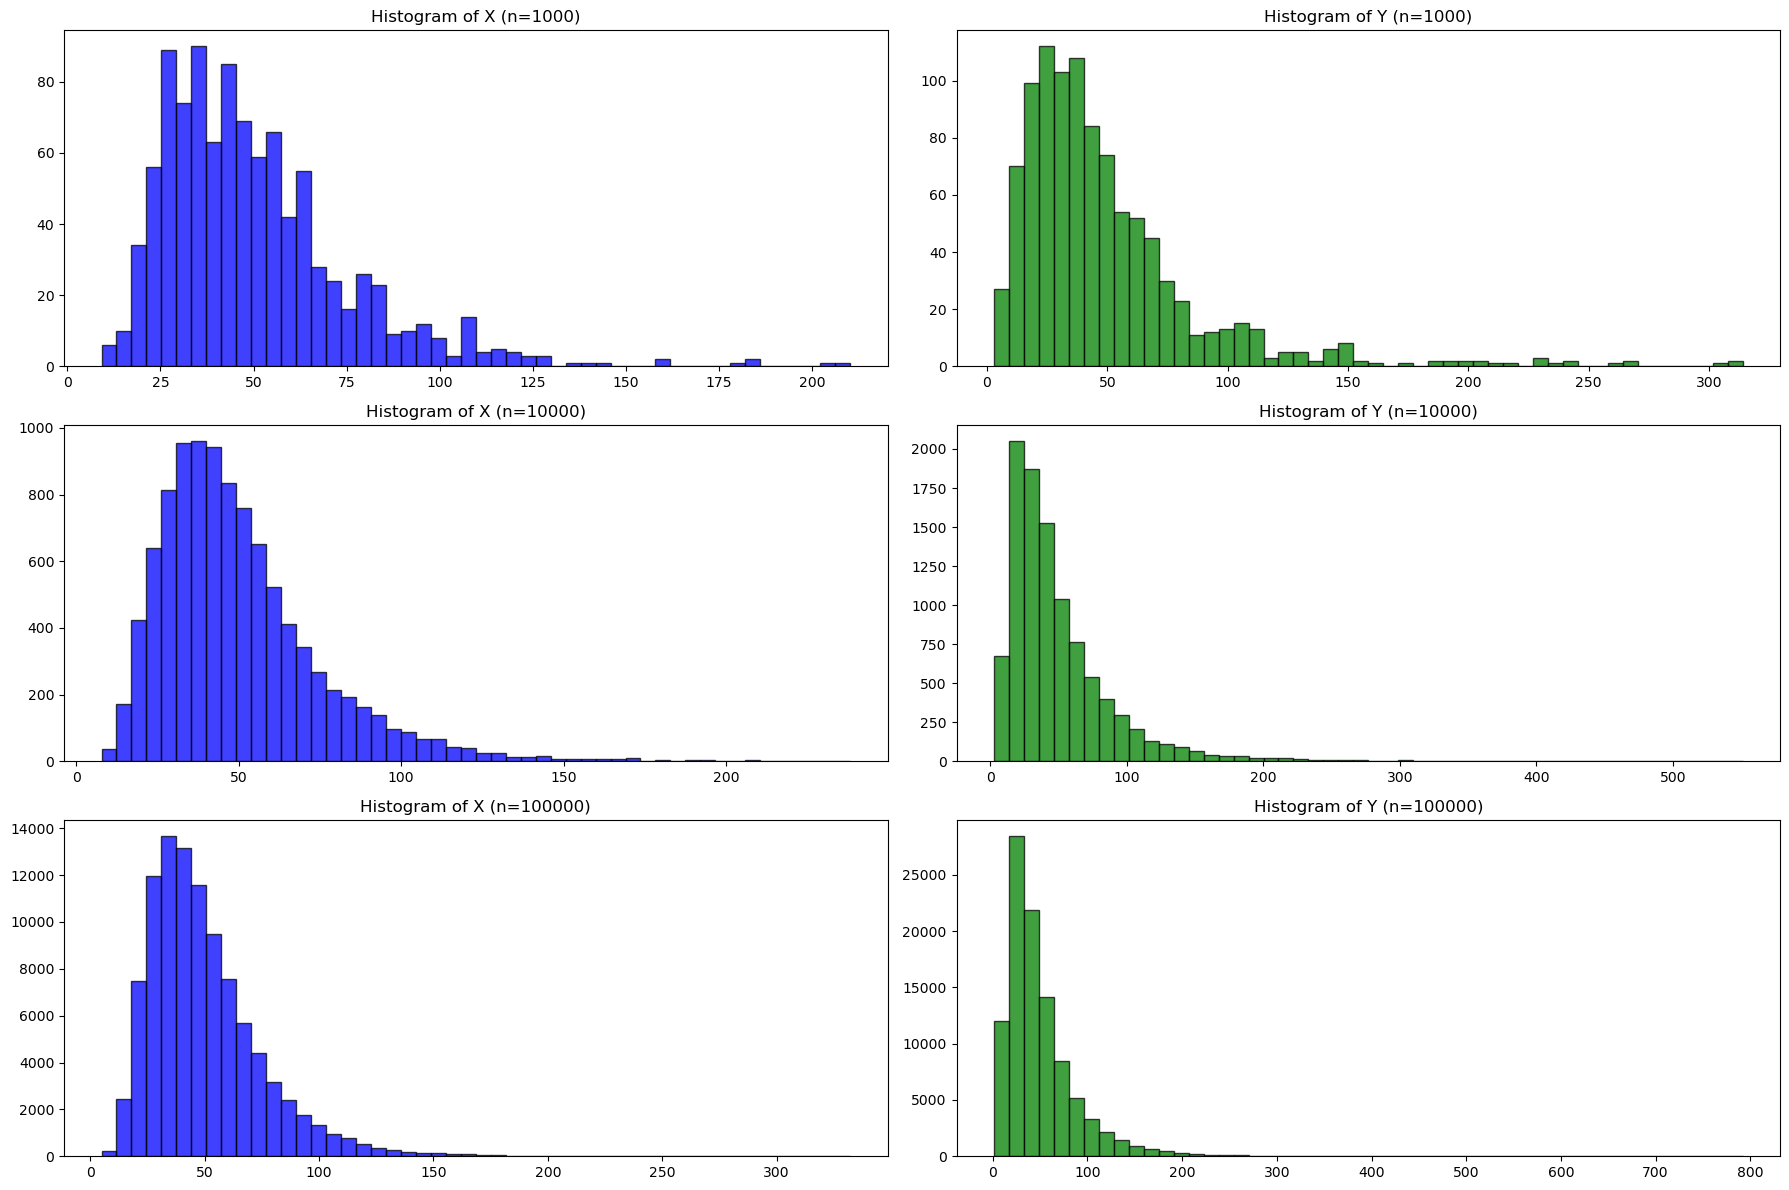

In [3]:
#ex b
import scipy.stats as stats


# Function to compute mu and sigma for log-normal distribution given mean and variance
def compute_log_normal_params(mean, variance):
    sigma_squared = np.log(1 + (variance / mean**2))
    mu = np.log(mean) - (sigma_squared / 2)
    sigma = np.sqrt(sigma_squared)
    return mu, sigma

# Given values
E_X = 50
Var_X = 25**2
E_Y = 50
Var_Y = 40**2

# Compute parameters for X and Y
mu_X, sigma_X = compute_log_normal_params(E_X, Var_X)
mu_Y, sigma_Y = compute_log_normal_params(E_Y, Var_Y)

# Function to simulate log-normal rv using uniform rv
def simulate_log_normal_rv(U, mu, sigma):
    return np.exp(mu + sigma * stats.norm.ppf(U))

# Sample sizes
sample_sizes = [1000, 10000, 100000]

# Results dictionary
results_X = {}
results_Y = {}

# Simulate for each sample size
for n in sample_sizes:
    U, V = np.random.uniform(0, 1, n), np.random.uniform(0, 1, n)
    X = simulate_log_normal_rv(U, mu_X, sigma_X)
    Y = simulate_log_normal_rv(V, mu_Y, sigma_Y)
    results_X[n] = X
    results_Y[n] = Y
    print(f"Simulated {n} samples for X and Y.")

# Plot the histograms of the results for visual inspection
plt.figure(figsize=(18, 12))

for i, n in enumerate(sample_sizes):
    X, Y = results_X[n], results_Y[n]
    
    plt.subplot(3, 2, 2*i + 1)
    plt.hist(X, bins=50, alpha=0.75, color='blue', edgecolor='black')
    plt.title(f'Histogram of X (n={n})')
    
    plt.subplot(3, 2, 2*i + 2)
    plt.hist(Y, bins=50, alpha=0.75, color='green', edgecolor='black')
    plt.title(f'Histogram of Y (n={n})')

plt.tight_layout()
plt.show()


Simulated 1000 samples for X and Y.
Simulated 10000 samples for X and Y.
Simulated 100000 samples for X and Y.
   Sample Size  Empirical Mean X  Theoretical Mean X  Empirical Std X  \
0         1000         49.874045                50.0        25.912364   
1        10000         50.168799                50.0        25.397595   
2       100000         49.984657                50.0        25.036361   

   Theoretical Std X  Empirical Mean Y  Theoretical Mean Y  Empirical Std Y  \
0               25.0         51.352865                50.0        45.271906   
1               25.0         50.233248                50.0        41.140768   
2               25.0         50.190809                50.0        40.089512   

   Theoretical Std Y  
0               40.0  
1               40.0  
2               40.0  


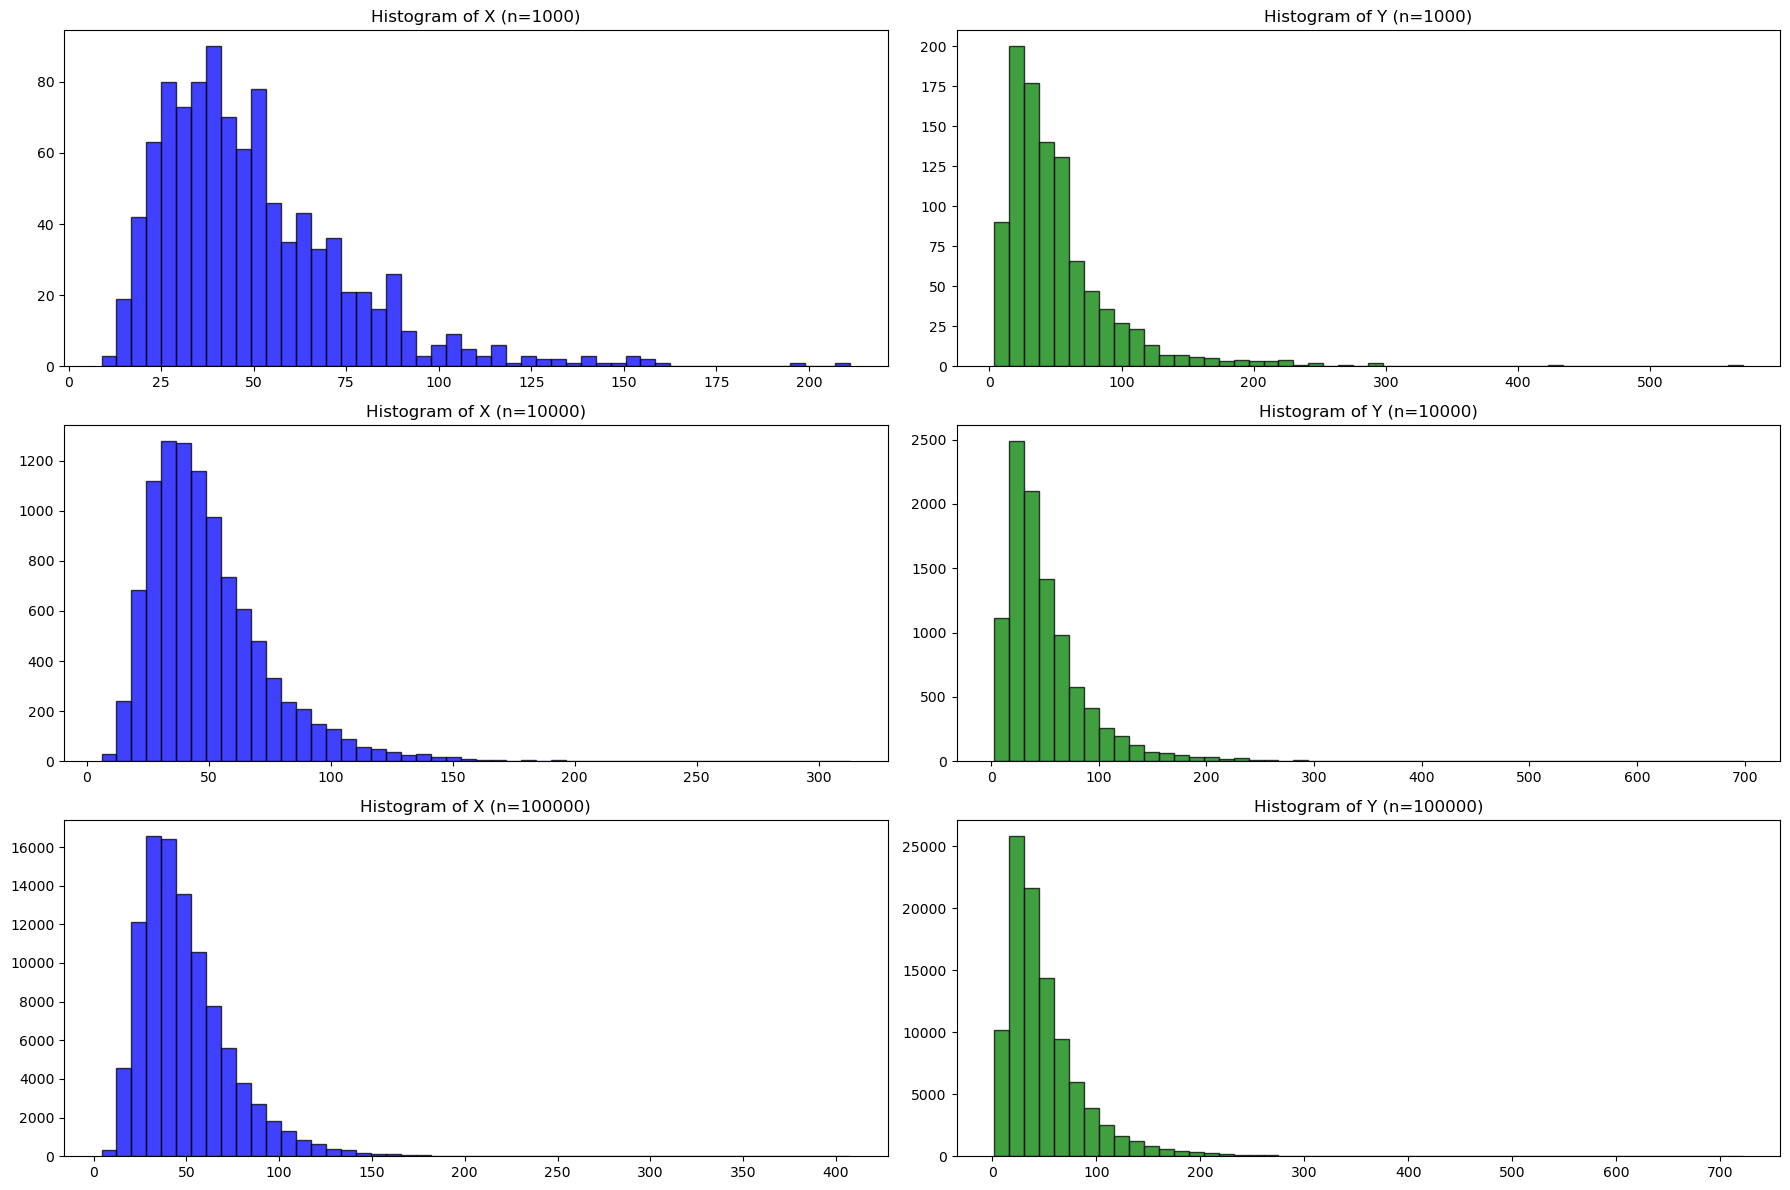

In [5]:
#ex c

# Function to compute mu and sigma for log-normal distribution given mean and variance
def compute_log_normal_params(mean, variance):
    sigma_squared = np.log(1 + (variance / mean**2))
    mu = np.log(mean) - (sigma_squared / 2)
    sigma = np.sqrt(sigma_squared)
    return mu, sigma

# Given values
E_X = 50
Var_X = 25**2
E_Y = 50
Var_Y = 40**2

# Compute parameters for X and Y
mu_X, sigma_X = compute_log_normal_params(E_X, Var_X)
mu_Y, sigma_Y = compute_log_normal_params(E_Y, Var_Y)

# Theoretical values
theoretical_mean_X = np.exp(mu_X + sigma_X**2 / 2)
theoretical_std_X = np.sqrt((np.exp(sigma_X**2) - 1) * np.exp(2 * mu_X + sigma_X**2))

theoretical_mean_Y = np.exp(mu_Y + sigma_Y**2 / 2)
theoretical_std_Y = np.sqrt((np.exp(sigma_Y**2) - 1) * np.exp(2 * mu_Y + sigma_Y**2))

# Function to simulate log-normal rv using uniform rv
def simulate_log_normal_rv(U, mu, sigma):
    return np.exp(mu + sigma * stats.norm.ppf(U))

# Sample sizes
sample_sizes = [1000, 10000, 100000]

# Results dictionary
results_X = {}
results_Y = {}

# Simulate for each sample size
for n in sample_sizes:
    U, V = np.random.uniform(0, 1, n), np.random.uniform(0, 1, n)
    X = simulate_log_normal_rv(U, mu_X, sigma_X)
    Y = simulate_log_normal_rv(V, mu_Y, sigma_Y)
    results_X[n] = X
    results_Y[n] = Y
    print(f"Simulated {n} samples for X and Y.")

# Function to calculate empirical mean and standard deviation
def calculate_empirical_stats(data):
    mean = np.mean(data)
    std = np.std(data)
    return mean, std

# Initialize table for results
results_table = []

# Calculate empirical values and compare with theoretical values
for n in sample_sizes:
    X = results_X[n]
    Y = results_Y[n]
    
    empirical_mean_X, empirical_std_X = calculate_empirical_stats(X)
    empirical_mean_Y, empirical_std_Y = calculate_empirical_stats(Y)
    
    results_table.append({
        "Sample Size": n,
        "Empirical Mean X": empirical_mean_X,
        "Theoretical Mean X": theoretical_mean_X,
        "Empirical Std X": empirical_std_X,
        "Theoretical Std X": theoretical_std_X,
        "Empirical Mean Y": empirical_mean_Y,
        "Theoretical Mean Y": theoretical_mean_Y,
        "Empirical Std Y": empirical_std_Y,
        "Theoretical Std Y": theoretical_std_Y
    })

# Display the results in a table format
import pandas as pd

results_df = pd.DataFrame(results_table)
print(results_df)

# Plot the histograms of the results for visual inspection
plt.figure(figsize=(18, 12))

for i, n in enumerate(sample_sizes):
    X, Y = results_X[n], results_Y[n]
    
    plt.subplot(3, 2, 2*i + 1)
    plt.hist(X, bins=50, alpha=0.75, color='blue', edgecolor='black')
    plt.title(f'Histogram of X (n={n})')
    
    plt.subplot(3, 2, 2*i + 2)
    plt.hist(Y, bins=50, alpha=0.75, color='green', edgecolor='black')
    plt.title(f'Histogram of Y (n={n})')

plt.tight_layout()
plt.show()


In [ ]:
#d Need of correlation coefficient or covariance

In [6]:
# 2 Var

#a
# Function to calculate the VaR at a given confidence level
def calculate_var(data, alpha):
    return np.percentile(data, alpha)

# Sample sizes
sample_sizes = [1000, 10000, 100000]

# VaR results dictionary
var_results = []

# Compute VaR for each sample size
alpha = 99.5
for n in sample_sizes:
    X = results_X[n]
    Y = results_Y[n]
    
    var_X = calculate_var(X, alpha)
    var_Y = calculate_var(Y, alpha)
    
    var_results.append({
        "Sample Size": n,
        "VaR_99.5%_X": var_X,
        "VaR_99.5%_Y": var_Y
    })

# Display the VaR results in a table format
var_results_df = pd.DataFrame(var_results)
print(var_results_df)


   Sample Size  VaR_99.5%_X  VaR_99.5%_Y
0         1000   153.134807   247.275413
1        10000   151.796508   238.097965
2       100000   151.595793   238.739595


In [7]:
#b
# Function to compute mu and sigma for log-normal distribution given mean and variance
def compute_log_normal_params(mean, variance):
    sigma_squared = np.log(1 + (variance / mean**2))
    mu = np.log(mean) - (sigma_squared / 2)
    sigma = np.sqrt(sigma_squared)
    return mu, sigma

# Function to simulate log-normal rv using uniform rv
def simulate_log_normal_rv(U, mu, sigma):
    return np.exp(mu + sigma * stats.norm.ppf(U))

# Function to calculate VaR at given alpha
def calculate_var(data, alpha):
    return np.percentile(data, alpha * 100)

# Function to calculate empirical mean and standard deviation
def calculate_empirical_stats(data):
    mean = np.mean(data)
    std = np.std(data)
    return mean, std

# Given values
E_X = 50
Var_X = 252**2
E_Y = 50
Var_Y = 402**2

# Compute parameters for X and Y
mu_X, sigma_X = compute_log_normal_params(E_X, Var_X)
mu_Y, sigma_Y = compute_log_normal_params(E_Y, Var_Y)

# VaR alpha level
alpha = 0.995

# Number of repetitions
num_repetitions = 100

# Sample sizes
sample_sizes = [1000, 10000, 100000]

# Results dictionary to store standard deviations of VaR estimates
var_std_results = []

# Repeat the simulation for each sample size
for n in sample_sizes:
    var_X_list = []
    var_Y_list = []
    
    for _ in range(num_repetitions):
        U, V = np.random.uniform(0, 1, n), np.random.uniform(0, 1, n)
        X = simulate_log_normal_rv(U, mu_X, sigma_X)
        Y = simulate_log_normal_rv(V, mu_Y, sigma_Y)
        
        var_X = calculate_var(X, alpha)
        var_Y = calculate_var(Y, alpha)
        
        var_X_list.append(var_X)
        var_Y_list.append(var_Y)
    
    std_var_X = np.std(var_X_list)
    std_var_Y = np.std(var_Y_list)
    
    var_std_results.append({
        "Sample Size": n,
        "Std Dev VaR_99.5% X": std_var_X,
        "Std Dev VaR_99.5% Y": std_var_Y
    })

# Display the results in a table format
var_std_results_df = pd.DataFrame(var_std_results)
print(var_std_results_df)


   Sample Size  Std Dev VaR_99.5% X  Std Dev VaR_99.5% Y
0         1000           266.789397           386.336965
1        10000            77.137188           109.906155
2       100000            27.099299            35.631432



It's interesting to observe the change in standard deviation of the VaR estimates with an increase in the number of repetitions (from 1 to 100). Let's analyze the results:


- **Sample Size 1000**:
  - Initially, the standard deviation for both \(X\) and \(Y\) was relatively high, indicating a wide variability in the VaR estimates.
  - With 100 repetitions, we observe a decrease in the standard deviation, indicating a reduction in variability in the VaR estimates as more samples are considered. However, the standard deviations are still relatively high compared to larger sample sizes.
- **Sample Size 10000**:
  - The standard deviations for both \(X\) and \(Y\) reduced significantly with 100 repetitions compared to the initial observation.
  - This suggests that with more repetitions, the VaR estimates become more stable and less variable.
- **Sample Size 100000**:
  - Similar to the case of sample size 10000, the standard deviations for both \(X\) and \(Y\) decreased further with 100 repetitions.
  - The standard deviations are now relatively small compared to the VaR estimates, indicating a high level of stability in the estimates.


- The decrease in standard deviation with an increase in repetitions implies that averaging the VaR estimates over multiple repetitions reduces the variability in the estimates.
- Higher sample sizes generally lead to more accurate and stable estimates, as seen in the reduced standard deviations for larger sample sizes.

c
- Increasing the number of repetitions generally improves the accuracy and stability of the VaR estimates, especially for smaller sample sizes.
- For critical risk assessments, it's advisable to use larger sample sizes and more repetitions to ensure reliable VaR estimates with low variability.